In [1]:
import pandas as pd
import geopandas as geo
import seaborn as sns
from matplotlib import pyplot as plt


import mlflow as ml


In [2]:
# Read-in data
house_prices = pd.read_csv(
    filepath_or_buffer="housing.csv", sep=","
)
house_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Dataset - Metadata
Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices

Dataset: The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data.

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea


In [3]:
# Descriptive stats
house_prices.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

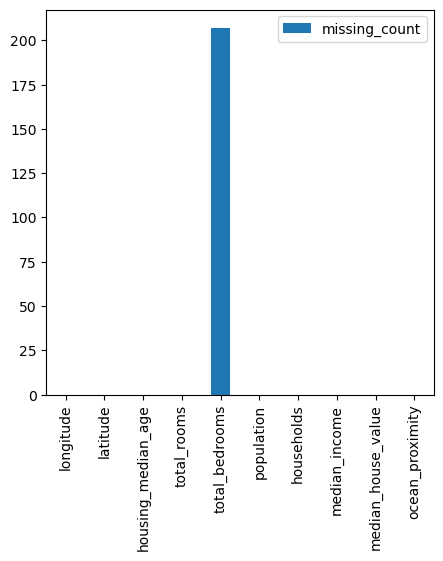

In [4]:
# Missing values
missing_values = pd.DataFrame(house_prices.isna().sum(), columns=["missing_count"])
missing_values.plot(kind="bar", figsize=(5, 5))

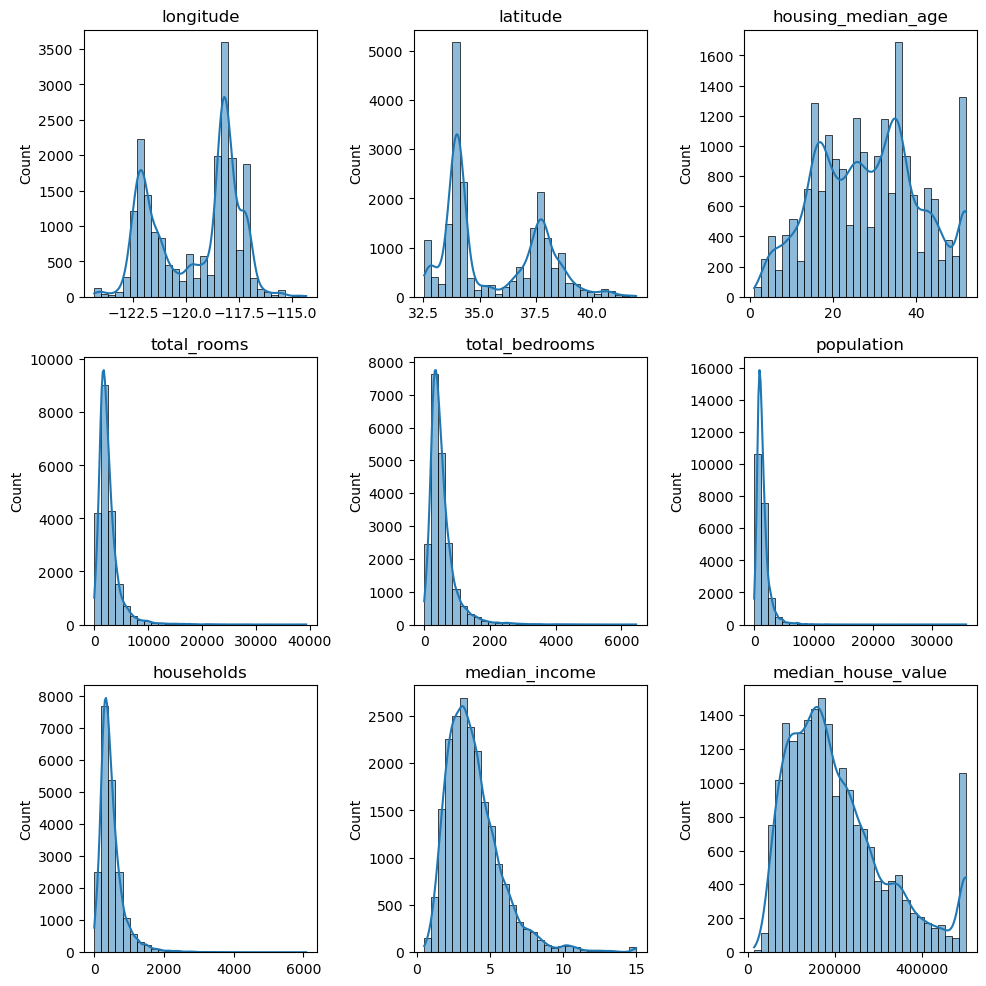

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
# plot each col onto one ax
for col, ax in zip(house_prices.columns, axes.flat):
    #house_prices[col].plot.hist(ax=ax, rot=0)
    sns.histplot(data=house_prices, x=col, kde=True, bins=30, ax=ax)
    ax.set_title(col)
    ax.set(xlabel=None)
fig.tight_layout(pad=1.2)
plt.show()

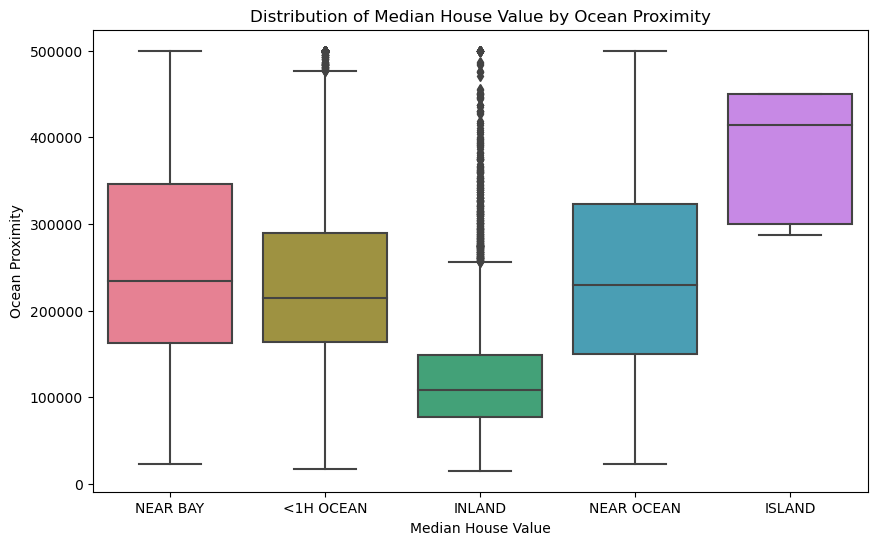

In [6]:
# Categorical feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=house_prices, x='ocean_proximity', y='median_house_value', orient="v", palette="husl")
plt.xlabel('Median House Value')
plt.ylabel('Ocean Proximity')
plt.title('Distribution of Median House Value by Ocean Proximity')
plt.show()

                                            geometry
0  MULTIPOLYGON (((-13317677.375 3930590.808, -13...


/Users/pdanninger/opt/miniconda3/envs/dsc_conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


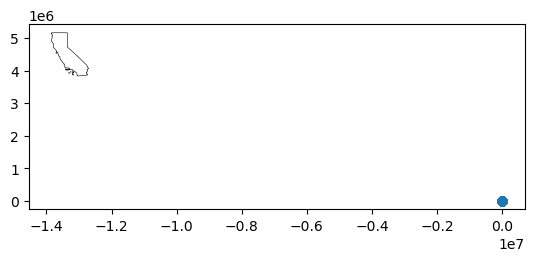

In [29]:
# Map
ca = geo.read_file("CA_State_TIGER2016.shp")
print(ca.head())
ca.crs = {'init' :'epsg:4326'}
ca.head()
#ca = ca.set_crs("epsg:4326")
#print(ca.crs)
#
ca.boundary.plot(color='Black', linewidth=.4, aspect=1)
plt.scatter(data=house_prices, x="longitude", y="latitude")
#house_prices.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
#        s=house_prices['population'] / 50, label='population', c='median_house_value', 
#        cmap=plt.get_cmap('jet'), figsize=(20,13))

In [8]:
# Correlations
